## Credit Card Fraud Kaggle Project

Logistic Regression and a random forest model to predict fraudulent transactions on credit card data. 

In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import os
# from geopy.distance import geodesic
import math
# import IPython
from IPython.display import display
from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
# from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [158]:
df = pd.read_csv("fraud_data.csv")

In [159]:
df

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,04-01-2019 00:58,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1
1,04-01-2019 15:06,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1
2,04-01-2019 22:37,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1
3,04-01-2019 23:06,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1
4,04-01-2019 23:59,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14441,22-01-2019 00:37,Hudson-Grady,shopping_pos,122.00,Athena,OR,45.8289,-118.4971,1302,Dealer,18-10-1976,699a4c06b22711bf3e0d8ef91232d356,46.442439,-118.524214,0
14442,22-01-2019 00:41,"""Nienow, Ankunding and Collie""",misc_pos,9.07,Gardiner,OR,43.7857,-124.1437,260,"""Engineer, maintenance""",01-09-1956,080d620d24815c7d6c637cf0b71dde8e,42.901265,-124.995317,0
14443,22-01-2019 00:42,Pacocha-O'Reilly,grocery_pos,104.84,Alva,WY,44.6873,-104.4414,110,"""Administrator, local government""",16-05-1973,3c346c8cd627c5fe3ed57430db2e9ae7,45.538062,-104.542117,0
14444,22-01-2019 00:48,"""Bins, Balistreri and Beatty""",shopping_pos,268.16,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,e66ffcc95ba7fc490486242af1205d04,64.081462,-165.898698,0


In [160]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14446 entries, 0 to 14445
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  14446 non-null  object 
 1   merchant               14446 non-null  object 
 2   category               14446 non-null  object 
 3   amt                    14446 non-null  float64
 4   city                   14446 non-null  object 
 5   state                  14446 non-null  object 
 6   lat                    14446 non-null  float64
 7   long                   14446 non-null  float64
 8   city_pop               14446 non-null  int64  
 9   job                    14446 non-null  object 
 10  dob                    14446 non-null  object 
 11  trans_num              14446 non-null  object 
 12  merch_lat              14446 non-null  float64
 13  merch_long             14446 non-null  float64
 14  is_fraud               14446 non-null  object 
dtypes:

In [161]:
#Value counts show that the data is imbalanced. Which is what would be expected for fraudulent activity.
df['is_fraud'].value_counts() #0 is not a fraud, 1 is a fraud.

is_fraud
0                         12600
1                          1844
1"2020-12-24 16:56:24"        1
0"2019-01-01 00:00:44"        1
Name: count, dtype: int64

In [162]:
#Dropping the two observations that are not a 0 or 1 but also have a timestamp.
df = df[df['is_fraud'].isin(['1', '0'])]

In [163]:
#This is not from baseline model. Remove transaction number, city, state, job, and merchant columns.
df.drop(columns=['trans_num', 'city', 'state', 'job', 'merchant'], inplace=True)

In [164]:
df

,trans_date_trans_time,category,amt,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud
0,04-01-2019 00:58,grocery_net,14.37,64.7556,-165.6723,145,09-11-1939,65.654142,-164.722603,1
1,04-01-2019 15:06,shopping_net,966.11,64.7556,-165.6723,145,09-11-1939,65.468863,-165.473127,1
2,04-01-2019 22:37,misc_pos,49.61,64.7556,-165.6723,145,09-11-1939,65.347667,-165.914542,1
3,04-01-2019 23:06,grocery_pos,295.26,64.7556,-165.6723,145,09-11-1939,64.445035,-166.080207,1
4,04-01-2019 23:59,health_fitness,18.17,64.7556,-165.6723,145,09-11-1939,65.447094,-165.446843,1
...,...,...,...,...,...,...,...,...,...,...
14441,22-01-2019 00:37,shopping_pos,122.00,45.8289,-118.4971,1302,18-10-1976,46.442439,-118.524214,0
14442,22-01-2019 00:41,misc_pos,9.07,43.7857,-124.1437,260,01-09-1956,42.901265,-124.995317,0
14443,22-01-2019 00:42,grocery_pos,104.84,44.6873,-104.4414,110,16-05-1973,45.538062,-104.542117,0
14444,22-01-2019 00:48,shopping_pos,268.16,64.7556,-165.6723,145,09-11-1939,64.081462,-165.898698,0


#### Feature Engineering

In [ ]:
#Creating an age category.
df['dob'][0]

df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], format="%d-%m-%Y %H:%M") #WE ADDED THIS.

#Age of the person when they made the transaction.
# df['age'] = (pd.to_datetime(df['trans_date_trans_time'], format="%d-%m-%Y %H:%M") - pd.to_datetime(df['dob'], format="%d-%m-%Y")).dt.days // 365 #Year idk.
df['age'] = (df['trans_date_trans_time'] - pd.to_datetime(df['dob'], format="%d-%m-%Y")).dt.days // 365 #Convert the date into years for age.

# Extracting the time of the day
# df['trans_date_trans_time'][0]
# df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], format="%d-%m-%Y %H:%M")
df['time_of_day'] = df['trans_date_trans_time'].dt.strftime('%H:%M')

# Hour of Day
df['hour'] = df['trans_date_trans_time'].dt.hour

#Extracting day of the week.
df['day_of_week'] = df['trans_date_trans_time'].dt.day_name()

#Create a new measure of the distance between lat and long and merchant lat and long
## Define the Haversine function
def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat / 2) ** 2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2) ** 2
    c = 2 * math.asin(math.sqrt(a))
    r = 6371.0  # Radius of Earth in kilometers
    distance = r * c
    return distance
    
## Apply Haversine function row-wise
df['distance_km'] = df.apply(
    lambda row: haversine(row['lat'], row['long'], row['merch_lat'], row['merch_long']),
    axis=1
)

In [166]:
df

,trans_date_trans_time,category,amt,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,age,time_of_day,hour,day_of_week,distance_km
0,2019-01-04 00:58:00,grocery_net,14.37,64.7556,-165.6723,145,09-11-1939,65.654142,-164.722603,1,79,00:58,0,Friday,109.285552
1,2019-01-04 15:06:00,shopping_net,966.11,64.7556,-165.6723,145,09-11-1939,65.468863,-165.473127,1,79,15:06,15,Friday,79.856896
2,2019-01-04 22:37:00,misc_pos,49.61,64.7556,-165.6723,145,09-11-1939,65.347667,-165.914542,1,79,22:37,22,Friday,66.807915
3,2019-01-04 23:06:00,grocery_pos,295.26,64.7556,-165.6723,145,09-11-1939,64.445035,-166.080207,1,79,23:06,23,Friday,39.636227
4,2019-01-04 23:59:00,health_fitness,18.17,64.7556,-165.6723,145,09-11-1939,65.447094,-165.446843,1,79,23:59,23,Friday,77.611529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14441,2019-01-22 00:37:00,shopping_pos,122.00,45.8289,-118.4971,1302,18-10-1976,46.442439,-118.524214,0,42,00:37,0,Tuesday,68.254405
14442,2019-01-22 00:41:00,misc_pos,9.07,43.7857,-124.1437,260,01-09-1956,42.901265,-124.995317,0,62,00:41,0,Tuesday,120.058408
14443,2019-01-22 00:42:00,grocery_pos,104.84,44.6873,-104.4414,110,16-05-1973,45.538062,-104.542117,0,45,00:42,0,Tuesday,94.929969
14444,2019-01-22 00:48:00,shopping_pos,268.16,64.7556,-165.6723,145,09-11-1939,64.081462,-165.898698,0,79,00:48,0,Tuesday,75.744640


In [ ]:
#Creating job categories.
# def job_categories(profession):
#     profession_lower = profession.lower()
    
#     # Education, Training, and Research
#     if any(keyword in profession_lower for keyword in [
#         'administrator, education', 'lecturer', 'teacher', 'professor', 'telecommunications researcher',
#         'research scientist', 'education officer', 'learning mentor', 'teaching laboratory technician',
#         'special educational needs', 'research officer', 'science writer', 'education administrator']):
#         return 'Education, Training, and Research'
    
#     # Healthcare, Therapy, and Well-being
#     elif any(keyword in profession_lower for keyword in [
#         'nurse', 'therapist', 'psychologist', 'counsellor', 'pharmacist', 'osteopath', 'chiropodist',
#         'health', 'clinical', 'physiotherapist', 'medical', 'audiological', 'exercise physiologist',
#         'music therapist', 'occupational therapist', 'podiatrist', 'occupational hygienist']):
#         return 'Healthcare, Therapy, and Well-being'
    
#     # Science, Engineering, and Technology
#     elif any(keyword in profession_lower for keyword in [
#         'cytogeneticist', 'scientist', 'engineer', 'geoscientist', 'geologist',
#         'cartographer', 'soil scientist', 'water engineer', 'systems developer']):
#         return 'Science, Engineering, and Technology'
    
#     # Business, Finance, and Law
#     elif any(keyword in profession_lower for keyword in [
#         'solicitor', 'legal', 'accountant', 'tax inspector', 'investment banker', 'economist',
#         'investment analyst', 'comptroller', 'financial', 'officer', 'sales', 'retail merchandiser',
#         'manager', 'chief marketing officer', 'marketing executive', 'public relations', 'futures trader',
#         'clothing/textile technologist', 'insurance broker', 'advertising account planner']):
#         return 'Business, Finance, and Law'
    
#     # Creative Arts, Design, and Media
#     elif any(keyword in profession_lower for keyword in [
#         'artist', 'set designer', 'web designer', 'glass blower', 'fashion designer', 'community arts worker',
#         'editor', 'journalist', 'video editor', 'musician', 'commissioning editor', 
#         'television', 'radio', 'media', 'production', 'designer', 'features editor']):
#         return 'Creative Arts, Design, and Media'
    
#     # Construction, Planning, and Environment
#     elif any(keyword in profession_lower for keyword in [
#         'architect', 'landscape architect', 'building surveyor', 'town planner',
#         'planning and development', 'minerals surveyor', 'civil engineer',
#         'historic buildings inspector', 'petroleum engineer', 'construction', 'surveyor, minerals',
#         'land/geomatics surveyor', 'buyer, industrial', 'surveyor, land/geomatics', 'contractor',
#         'surveyor, mining', 'metallurgist']):
#         return 'Construction, Planning, and Environment'
    
#     # Public Sector, Civil Service, and Government
#     elif any(keyword in profession_lower for keyword in [
#         'civil service', 'local government officer', 'immigration officer',
#         'armed forces', 'charity officer', 'international aid', 'police', 'firefighter',
#         'intelligence analyst', 'public librarian', 'administrator, local government']):
#         return 'Public Sector, Civil Service, and Government'
    
#     # IT and Information Systems
#     elif any(keyword in profession_lower for keyword in [
#         'network engineer', 'systems analyst', 'information officer', 'it consultant', 
#         'information systems manager', 'developer']):
#         return 'IT and Information Systems'

#      # Pilot
#     elif any(keyword in profession_lower for keyword in [
#         'airline pilot', 'pilot, airline']):
#         return 'Pilot'
    #     # Other
#     else:
#         return 'Other'

# # Apply the function to the column 'job'
# df['professions'] = df['job'].apply(job_categories)

KeyError: 'job'

In [ ]:
#Transforming specific data into categorical variables.
df['merchant'] = df['merchant'].astype('category')
df['category'] = df['category'].astype('category')
df['city'] = df['city'].astype('category')
df['state'] = df['state'].astype('category')
df['day_of_week'] = df['day_of_week'].astype('category')
df['professions'] = df['professions'].astype('category')
df['hour'] = df['hour'].astype('category')
df['is_fraud'] = df['is_fraud'].astype(int)

KeyError: 'city'

In [ ]:
#Checking the variable types.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 14444 entries, 0 to 14445
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  14444 non-null  datetime64[ns]
 1   merchant               14444 non-null  category      
 2   category               14444 non-null  category      
 3   amt                    14444 non-null  float64       
 4   city                   14444 non-null  category      
 5   state                  14444 non-null  category      
 6   lat                    14444 non-null  float64       
 7   long                   14444 non-null  float64       
 8   city_pop               14444 non-null  int64         
 9   job                    14444 non-null  object        
 10  dob                    14444 non-null  object        
 11  merch_lat              14444 non-null  float64       
 12  merch_long             14444 non-null  float64       
 13  is_fra

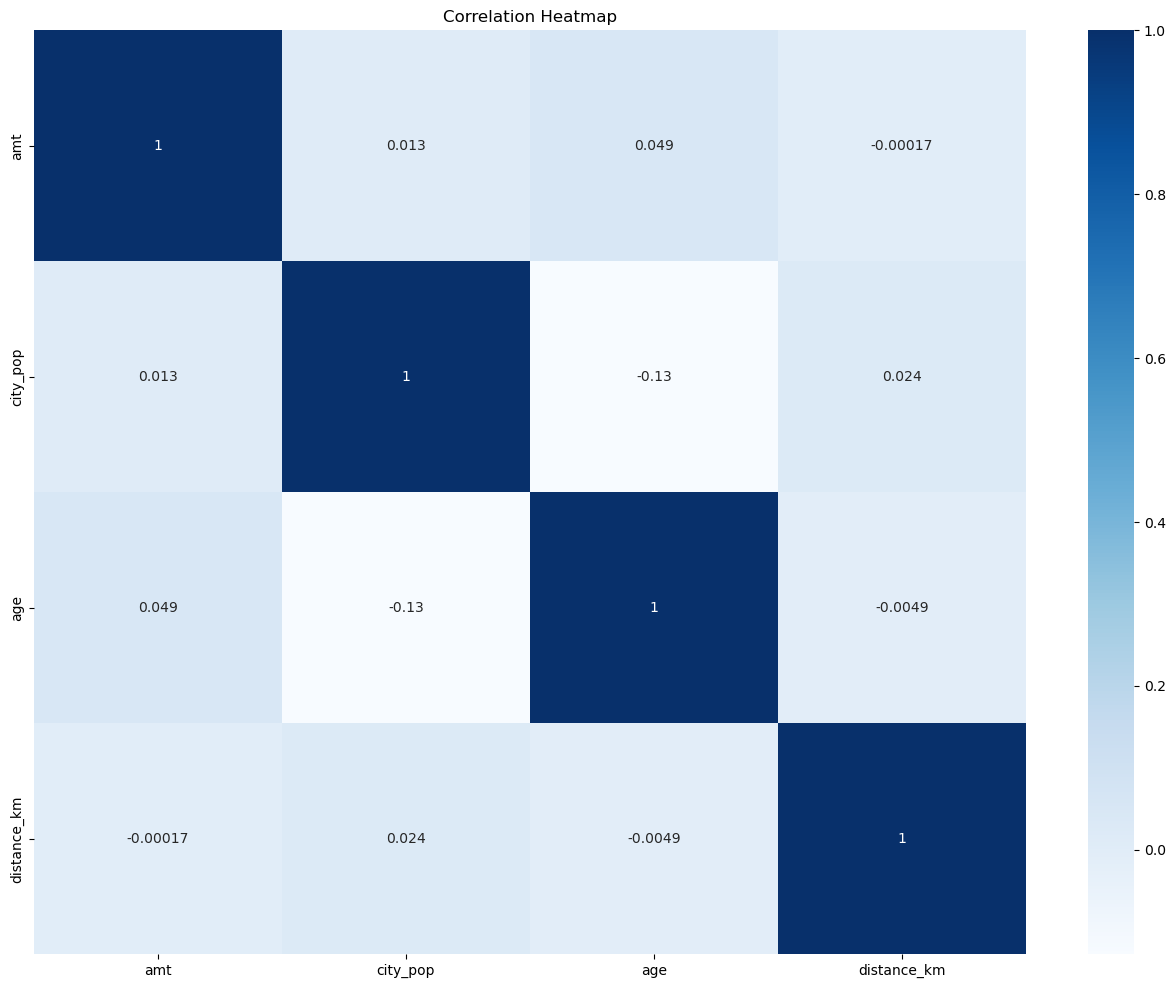

In [ ]:
# The correlation matrix shows that the numeric data is not correlated.
quantdata = df[["amt", "city_pop", "age", "distance_km"]]
corr_matrix = quantdata.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
#No NAs in dataset before data modeling.
nan_counts = df.isna().sum()
print(nan_counts)

trans_date_trans_time    0
merchant                 0
category                 0
amt                      0
city                     0
state                    0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
merch_lat                0
merch_long               0
is_fraud                 0
age                      0
time_of_day              0
hour                     0
day_of_week              0
distance_km              0
professions              0
dtype: int64


### Logistic Regression to Predict Fraud

In [ ]:
#Split into Train and Test
train_data, test_data = train_test_split(df, test_size=0.3, random_state=42)

In [ ]:
formula = "is_fraud ~ age + amt + hour + category + state"
log_reg = smf.logit(formula = formula, data = train_data).fit(maxiter=1000) #Maybe change maxiterator to see if we can make a better model.

Optimization terminated successfully.
         Current function value: 0.161777
         Iterations 9


In [ ]:
# from IPython.display import display
#Predict Probabilities
preds = log_reg.predict(test_data)
#Add predictions and agreement columns to the dataframe
test_data['prob'] = preds
test_data['prediction'] = np.where(test_data['prob'] > 0.4, 1, 0)
test_data['agree'] = np.where(test_data['prediction'] == test_data['is_fraud'], 1, 0)
#calculate naive accuracy, model accuracy, and AUC
naive_accuracy = 1 - test_data['is_fraud'].sum() / len(test_data)
accuracy = test_data['agree'].sum() / len(test_data)
auc = roc_auc_score(test_data['is_fraud'], preds)
#Identify Disagreements
disagree = test_data[test_data['agree'] == 0]
#Display Results
display(naive_accuracy, accuracy, auc, log_reg.summary())

np.float64(0.870327641901246)

np.float64(0.9497000461467466)

np.float64(0.9514157511991335)

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               is_fraud   No. Observations:                10110
Model:                          Logit   Df Residuals:                    10059
Method:                           MLE   Df Model:                           50
Date:                Tue, 25 Mar 2025   Pseudo R-squ.:                  0.5746
Time:                        11:56:48   Log-Likelihood:                -1635.6
converged:                       True   LL-Null:                       -3844.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -3.1820      0.492     -6.470      0.000      -4.146      -2.218
hour[T.1]                     -0.0125      0.193     -0.065      0.948      -0.392       0.367
hour[T.2]                     -0.1456      0.203     -0.718      0.473      -0.543       0.252
hour[T.3]                     -0.1441      0.198     -0.728      0.467      -0.532       0.244
hour[T.4]                     -3.0258      0.528     -5.726      0.000      -4.061      -1.990
hour[T.5]                     -2.2045      0.376     -5.868      0.000      -2.941      -1.468
hour[T.6]                     -3.1429      0.601     -5.231      0.000      -4.320      -1.965
hour[T.7]                     -2.6170      0.447     -5.849      0.000      -3.494      -1.740
hour[T.8]                     -2.2147      0.377     -5.878      0.000      -2.953      -1.476
hour[T.9]                     -2.2090      0.401     -5.513      0.000      -2.994      -1.424
hour[T.10]                    -2.6314      0.458     -5.744      0.000      -3.529      -1.734
hour[T.11]                    -3.5409      0.642     -5.516      0.000      -4.799      -2.283
hour[T.12]                    -1.5991      0.475     -3.369      0.001      -2.529      -0.669
hour[T.13]                    -1.5018      0.473     -3.175      0.001      -2.429      -0.575
hour[T.14]                    -1.0167      0.416     -2.443      0.015      -1.832      -0.201
hour[T.15]                    -0.9732      0.402     -2.419      0.016      -1.762      -0.185
hour[T.16]                    -1.2810      0.432     -2.967      0.003      -2.127      -0.435
hour[T.17]                    -1.2386      0.418     -2.962      0.003      -2.058      -0.419
hour[T.18]                    -1.8319      0.459     -3.987      0.000      -2.732      -0.931
hour[T.19]                    -1.8050      0.532     -3.392      0.001      -2.848      -0.762
hour[T.20]                    -1.6121      0.468     -3.444      0.001      -2.529      -0.695
hour[T.21]                    -1.8789      0.466     -4.032      0.000      -2.792      -0.966
hour[T.22]                     1.6918      0.255      6.642      0.000       1.193       2.191
hour[T.23]                     1.8288      0.253      7.215      0.000       1.332       2.326
category[T.food_dining]        0.6444      0.327      1.972      0.049       0.004       1.285
category[T.gas_transport]      2.8228      0.323      8.750      0.000       2.191       3.455
category[T.grocery_net]        2.2260      0.394      5.650      0.000       1.454       2.998
category[T.grocery_pos]        2.5933      0.305      8.516      0.000       1.996       3.190
category[T.health_fitness]     0.7070      0.328      2.152      0.031       0.063       1.351
category[T.home]               0.3287      0.307      1.071      0.284      -0.273       0.930
category[T.kids_pets]          0.8922      0.305      2.928      0.003       0.295       1.489
category[T.

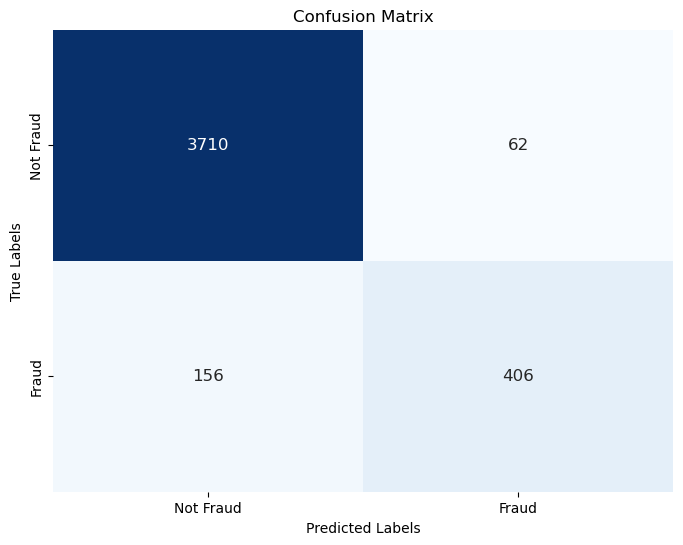

############################################################
                                                             Classification Report
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3772
           1       0.87      0.72      0.79       562

    accuracy                           0.95      4334
   macro avg       0.91      0.85      0.88      4334
weighted avg       0.95      0.95      0.95      4334



In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(test_data['is_fraud'], test_data['prediction'])

# Define labels for the classes
labels = ["Not Fraud", "Fraud"]

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=labels, yticklabels=labels, annot_kws={"size": 12})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


print("#" * 60)
print(" " * 60, "Classification Report")
print(classification_report(test_data['is_fraud'], test_data['prediction']))

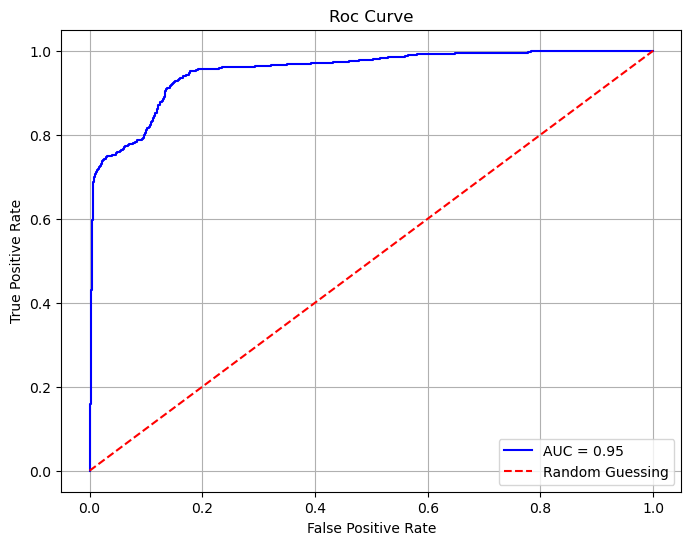

In [ ]:
preds = log_reg.predict(test_data)
y_pred_proba = 1 / (1 + np.exp(-preds))

fpr, tpr, _ = roc_curve(test_data['is_fraud'], y_pred_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='b', label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Gradient Boosted Random Forest for Fraud Prediction

In [ ]:
#creating a new dataframe for the Random Forest
dftree = df[['is_fraud', 'merchant', 'category', 'amt', 'city_pop', 'age', 'hour', 'day_of_week', 'distance_km', 'professions']].copy()
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
le = LabelEncoder()

# Apply label encoding to each categorical column
dftree['merchant'] = le.fit_transform(dftree['merchant'])
dftree['category'] = le.fit_transform(dftree['category'])
dftree['day_of_week'] = le.fit_transform(dftree['day_of_week'])
dftree['professions'] = le.fit_transform(dftree['professions'])
dftree['hour'] = le.fit_transform(dftree['hour'])


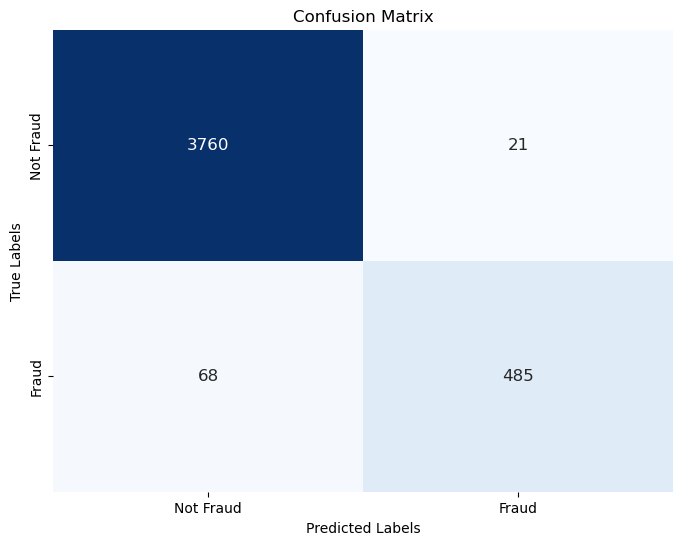

############################################################
                     Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3781
           1       0.96      0.88      0.92       553

    accuracy                           0.98      4334
   macro avg       0.97      0.94      0.95      4334
weighted avg       0.98      0.98      0.98      4334



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Splitting the dataset into train and test sets
X = dftree.drop(columns=['is_fraud'])  # Features
y = dftree['is_fraud']                # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize Random Forest with class weight to handle imbalanced classes
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]  # For AUC-ROC score


# Compute the confusion matrix
cm1 = confusion_matrix(y_test, y_pred)
# Define labels for the classes
labels = ["Not Fraud", "Fraud"]
plt.figure(figsize=(8,6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=labels, yticklabels=labels, annot_kws={"size": 12})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print("#" * 60)
print(" " * 20, "Classification Report")
print(classification_report(y_test, y_pred))

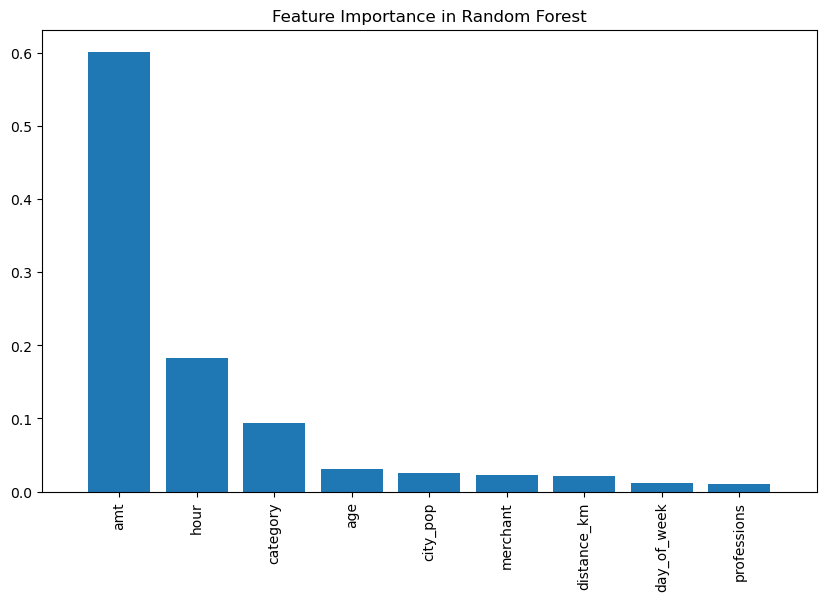

In [ ]:
importances = rf.feature_importances_

indices = np.argsort(importances)[::-1]

feature_names = X_train.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance in Random Forest")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), np.array(feature_names)[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [ ]:
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


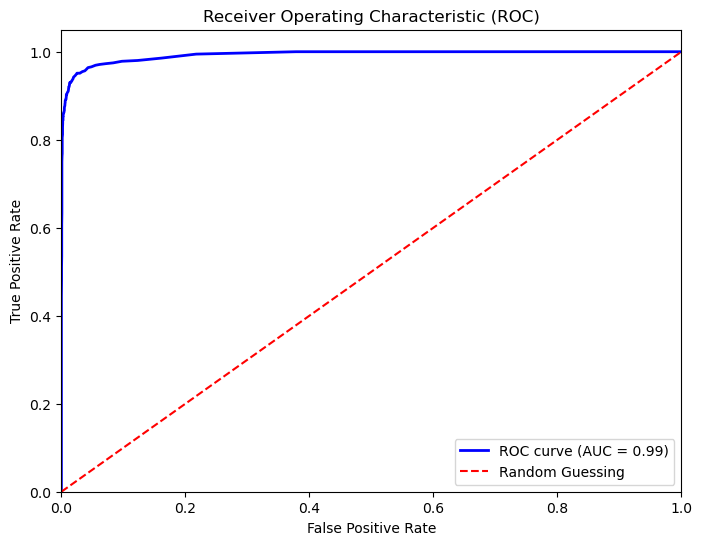

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()



In [ ]:
from sklearn.model_selection import cross_val_score
# Perform 5-fold cross-validation
scores = cross_val_score(rf, X, y, cv=5, scoring='roc_auc')

# Print each fold's AUC score and the average
print("AUC scores for each fold:", scores)
print("Mean AUC score:", scores.mean())

AUC scores for each fold: [0.99326849 0.99105637 0.99604196 0.99096496 0.99016617]
Mean AUC score: 0.9922995910762678
